1. 导入必要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

2.创建虚拟数据集

In [2]:
np.random.seed(42)
data_size = 10000
data = {
    'age': np.random.randint(18, 70, size=data_size),
    'income': np.random.randint(20000, 120000, size=data_size),
    'visits': np.random.poisson(5, size=data_size),
    'time_on_site': np.random.exponential(5, size=data_size),
    'click_through_rate': np.random.uniform(0, 1, size=data_size),
    'previous_purchases': np.random.randint(0, 20, size=data_size),
    'purchase': np.random.choice([0, 1], size=data_size, p=[0.7, 0.3]),
}

df = pd.DataFrame(data)

3.数据分析与可视化

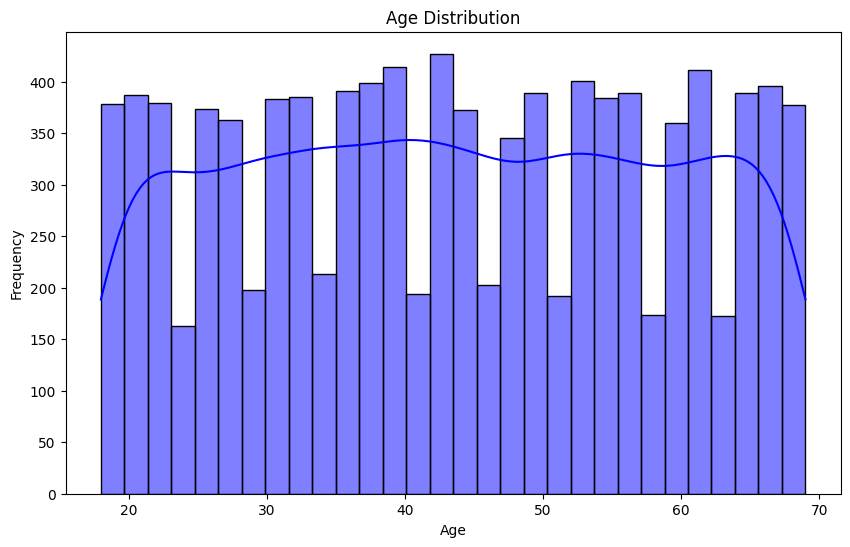

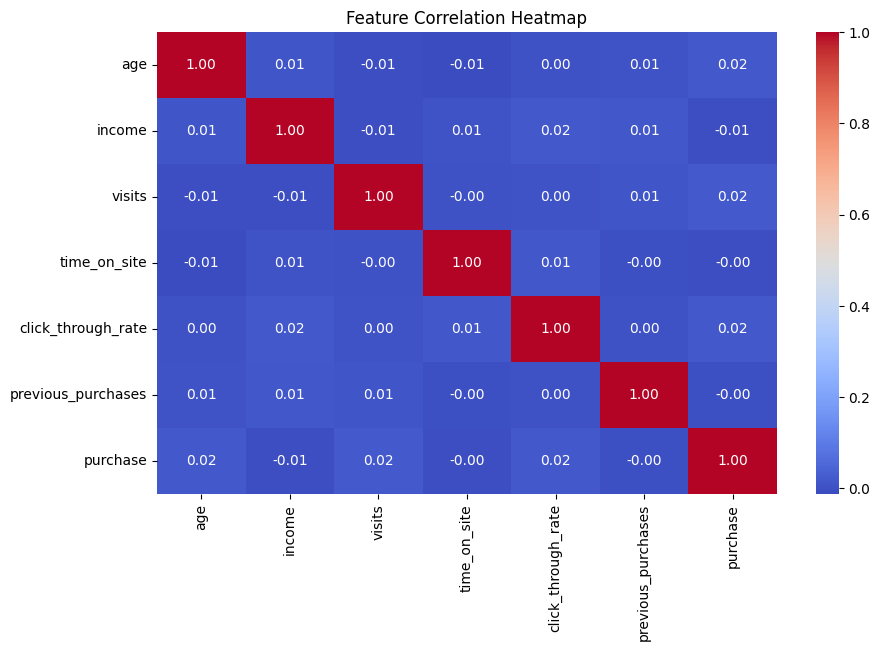

C:\Users\31458\AppData\Local\Temp\ipykernel_18328\3903264898.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase', data=df, palette='Set2')


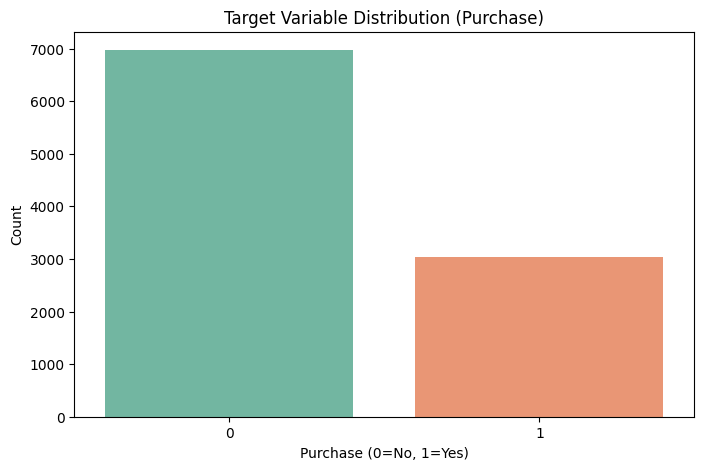

C:\Users\31458\AppData\Local\Temp\ipykernel_18328\3903264898.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='purchase', y='time_on_site', data=df, palette='Set3')


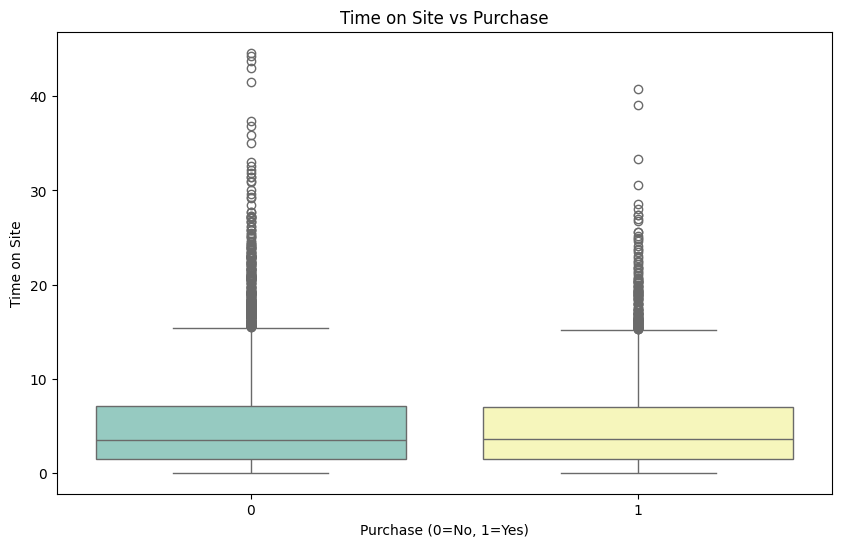

In [3]:
# 2.1 年龄分布直方图
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2 特征相关性热图
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 2.3 目标变量分布
plt.figure(figsize=(8, 5))
sns.countplot(x='purchase', data=df, palette='Set2')
plt.title('Target Variable Distribution (Purchase)')
plt.xlabel('Purchase (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# 2.4 停留时间与购买关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='purchase', y='time_on_site', data=df, palette='Set3')
plt.title('Time on Site vs Purchase')
plt.xlabel('Purchase (0=No, 1=Yes)')
plt.ylabel('Time on Site')
plt.show()

4.模型训练与预测

In [4]:
# 准备数据
X = df.drop('purchase', axis=1)
y = df['purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化并训练模型
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# 预测
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

5.模板性能评估

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81      2105
           1       0.32      0.03      0.06       895

    accuracy                           0.69      3000
   macro avg       0.51      0.50      0.44      3000
weighted avg       0.59      0.69      0.59      3000

Confusion Matrix:
 [[2042   63]
 [ 866   29]]
ROC AUC Score: 0.48566966122161914


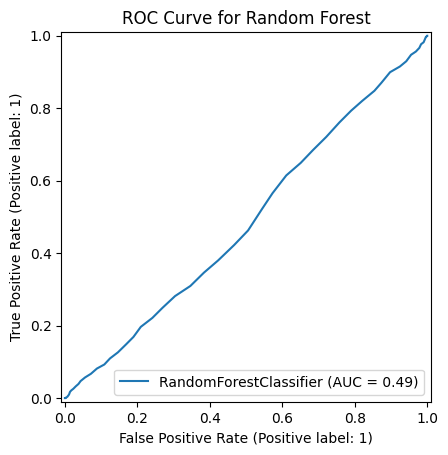

In [5]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# 绘制ROC曲线
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve for Random Forest")
plt.show()

6.超参数优化

In [6]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


7. 使用最优参数重新训练模型

In [7]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_best_pred = best_rf.predict(X_test)
y_best_prob = best_rf.predict_proba(X_test)[:, 1]

print("Optimized Classification Report:\n", classification_report(y_test, y_best_pred))
print("Optimized ROC AUC Score:", roc_auc_score(y_test, y_best_prob))

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.99      0.82      2105
           1       0.29      0.01      0.02       895

    accuracy                           0.70      3000
   macro avg       0.50      0.50      0.42      3000
weighted avg       0.58      0.70      0.58      3000

Optimized ROC AUC Score: 0.48947305564033494
